# PyEarthScience:  Python examples for Earth Scientists

## contour plots

### Using PyNGL

#### Contour plot with
    - ICON data
    - colored triangles

In [1]:
import numpy as np
import math, time
import Ngl,Nio

Retrieve time for wallclock time computation.

In [2]:
t1 = time.time()                                   #-- retrieve start time
print ""

Open file and read variables.

In [3]:
#--  define variables
diri    = "/Users/k204045/NCL/PyNGL/User_Guide_examples/" #-- data path
fname   = "ta_ps_850.nc"                           #-- data file
gname   = "r2b4_amip.nc"                           #-- grid info file
VarName = "ta"                                     #-- variable name       

#--  open file and read variables
f = Nio.open_file(diri + fname,"r")                #-- add data file
g = Nio.open_file(diri + gname,"r")                #-- add grid file (not contained in data file!!!)

#-- read a timestep of "ta" 
variable =  f.variables["ta"]                      #-- first time step, lev, ncells
var      =  variable[0,0,:]                        #-- ta [time,lev,ncells]
var      =  var - 273.15                           #-- convert to degrees Celsius

#-- check if missing value set
if not hasattr(var,"_FillValue"):
   var._FillValue    =  np.array(1.e20,dtype='f')  #-- set _FillValue
if not hasattr(var,"missing_value"):
   var.missing_value =  np.array(1.e20,dtype='f')  #-- set missing_value

Define title string, minimum and maximum contour values, interval and levels.

In [4]:
title    = "ICON:  Surface temperature"            #-- title string
varMin   = -32                                     #-- data minimum
varMax   =  28                                     #-- data maximum
varInt   =   4                                     #-- data increment
levels   =  range(varMin,varMax,varInt)            #-- set levels array

Define the x-, y-values and the polygon points.

In [5]:
rad2deg = 45./np.arctan(1.)                        #-- radians to degrees

x      =  g.variables["clon"][:]
y      =  g.variables["clat"][:]
vlon   =  g.variables["clon_vertices"][:]
vlat   =  g.variables["clat_vertices"][:]

ncells =  vlon.shape[0]                            #-- number of cells
nv     =  vlon.shape[1]                            #-- number of edges

x      =  x    * rad2deg                           #-- cell center, lon
y      =  y    * rad2deg                           #-- cell center, lat
vlat   =  vlat * rad2deg                           #-- cell lattitude vertices
vlon   =  vlon * rad2deg                           #-- cell longitude vertices

#-- longitude values -180. - 180.
for j in xrange(1,ncells):
    for i in range(1,nv):
        if vlon[j,i] < -180. :
           vlon[j,i] = vlon[j,i] + 360.
        if vlon[j,i] > 180. :
           vlon[j,i] = vlon[j,i] - 360.

#-- information
print ""
print "Cell points:           ", nv
print "Cells:                 ", str(ncells)
print "Variable ta   min/max:  %.2f " % np.min(var) + "/" + " %.2f" % np.max(var)
print ""


Cell points:            3
Cells:                  20480
Variable ta   min/max:  -34.87 / 21.07



Open workstation for first plot, here x11 window.

In [6]:
wks_type = "png"                                   #-- output type
wks      =  Ngl.open_wks(wks_type,"plot_unstructured_ICON_triangles_1_PyNGL") #-- open workstation

Set resources and do the first plot.

In [7]:
res                      =  Ngl.Resources()        #-- plot mods desired.
res.nglDraw              =  False                  #-- turn off plot draw and frame advance. We will
res.nglFrame             =  False                  #-- do it later after adding subtitles.

res.cnFillOn             =  True                   #-- color plot desired
res.cnFillPalette        = "BlueWhiteOrangeRed"    #-- choose colormap
res.cnLinesOn            =  False                  #-- turn off contour lines
res.cnLineLabelsOn       =  False                  #-- turn off contour labels
res.cnLevelSelectionMode = "ExplicitLevels"        #-- set explicit levels
res.cnLevels             =  levels                 #-- set levels

res.lbOrientation        = "Horizontal"            #-- vertical by default
res.lbBoxLinesOn         =  False                  #-- turn off labelbar boxes
res.lbLabelFontHeightF   =  0.01                   #-- labelbar label font height

res.mpFillOn             =  False                  #-- don't draw map outlines
res.mpGridAndLimbOn      =  False                  #-- don't draw grid lines

res.cnFillMode           = "CellFill"              #-- set fill mode
res.sfXArray             =  x                      #-- transform x to mesh scalar field
res.sfYArray             =  y                      #-- transform y to mesh scalar field
res.sfXCellBounds        =  vlon                   #-- needed if set cnFillMode = "CellFill"
res.sfYCellBounds        =  vlat                   #-- needed if set cnFillMode = "CellFill"

res.tiMainString         = "ICON grid - raster fill"
res.tiMainOffsetYF       =  0.03                   #-- move main title towards plot

#-- create the contour plot to retrieve levels and colors
plot = Ngl.contour_map(wks,var,res)

Ngl.draw(plot)
Ngl.frame(wks)
del(levels)

Settings for the second plot.

In [8]:
#-- retrieve the colors and levels from first contour plot
levels   =  list(Ngl.get_float_array(plot.contour,"cnLevels"))
labels   =  list(Ngl.get_string_array(plot.contour,"cnLevels"))
nlevels  =  len(levels)

#-- define colormap (RGB value range 0-255)
colormap255 = np.array([[  0,   0,   0], [255, 255, 255], [ 80, 255, 255], \
                        [ 27,  44,  98], [ 45, 102, 175], [ 66, 133, 196], \
                        [ 90, 166, 217], [119, 189, 230], [148, 211, 243], \
                        [215, 239, 249], [237, 248, 252], [255, 255, 255], \
                        [254, 248, 218], [253, 208, 107], [253, 167,  49], \
                        [247, 124,  43], [231,  75,  41], [203,  30,  38], \
                        [146,  21,  25]], int)

ncol     =  colormap255.shape[0]                     #-- number of colors
colormap =  np.array(colormap255)/255.               #-- convert to RGB value range 0.0-1.0

Open a workstation for second plot:  triangles plot.

In [9]:
wkres            =  Ngl.Resources()
wkres.wkColorMap =  colormap                       #-- choose colormap
wks2_type        = "png"                           #-- output type
wks2             =  Ngl.open_wks(wks2_type,"plot_unstructured_ICON_triangles_2_PyNGL",wkres) #-- open workstation

Map resource settings and create the map plot for the second plot.

In [10]:
mpres                             =  Ngl.Resources()
mpres.nglDraw                     =  False         #-- turn off plot draw and frame advance. We will
mpres.nglFrame                    =  False         #-- do it later after adding subtitles.

mpres.mpGridAndLimbOn             =  False         #-- don't draw grid lines
mpres.mpGeophysicalLineThicknessF =  2.            #-- map outlines thicker

mpres.tiMainString                = "ICON data - gsSegments" #-- title string

#-- create map
map = Ngl.map(wks2,mpres)
Ngl.draw(map)                                     #-- draw the empty map

Create the levels and colors for the polygons.

In [11]:
#-- assign array which will hold the color indices of the cells
colors    =  range(3,ncol+3)                       #-- create color indices
gscolors  =  np.ones((ncells,),dtype=np.int)       #-- assign array containing zeros
gscolors  =  -1*np.array(gscolors)                 #-- initialize to transparent color

#-- lowest level polygons
vlow = Ngl.ind(var < levels[0])
for k in xrange(0,len(vlow)-1):
    if not np.all(var[vlow] == var._FillValue):
       for kk in vlow:
           gscolors[kk] = 3  
print "finished level 0 -- " + str(len(vlow)) + " polygons considered - gscolors " + str(colors[0])

#-- all cells in between levels
for m in xrange(0,nlevels-1):
    vind = []                                      #-- empty list for color indices
    for i in xrange(0,ncells-1):
        if (var[i] >= levels[m] and var[i] < levels[m+1]):
           gscolors[i] = colors[m]
           vind.append(i)
        if (var[i] == var._FillValue or var[i] == var.missing_value):
           gscolors[i] = 2

    print "finished level " + str(m) + " -- " + str(len(vind)) + " polygons considered - gscolors " + str(colors[m])
    del vind

#-- all cells higher than the highest level
vhgh = Ngl.ind(var >= levels[nlevels-1])

for n in xrange(0, len(vhgh)-1):
    if not np.all(var[vhgh] == var._FillValue):
       for nn in vhgh:
           gscolors[nn] = colors[nlevels-1]
          
print "finished level " + str(nlevels) + " -- " + str(len(vhgh)) + " polygons considered - gscolors " + str(colors[nlevels-1])
print "++ gscolors:     ", gscolors[:]
print "++ min/max vlon: ", np.min(vlon), np.max(vlon)
print "++ min/max vlat: ", np.min(vlat), np.max(vlat)

#-- set polygon resources
pgres                             =  Ngl.Resources()
pgres.gsEdgesOn                   =  True                 #-- draw the edges
pgres.gsFillIndex                 =  0                    #-- solid fill
pgres.gsLineColor                 = "black"               #-- edge line color
pgres.gsLineThicknessF            =  0.7                  #-- line thickness
pgres.gsColors                    =  gscolors             #-- use color array
pgres.gsSegments                  =  range(0,len(vlon[:,0])*3,3)  #-- define segments array

x1d  =  np.ravel(vlon)                                    #-- 1D-array
y1d  =  np.ravel(vlat)                                    #-- 1D-array

#-- draw polygons
polyg  = Ngl.add_polygon(wks2,map,x1d,y1d,pgres)          #-- add polygons to map

finished level 0 -- 57 polygons considered - gscolors 3
finished level 0 -- 402 polygons considered - gscolors 3
finished level 1 -- 583 polygons considered - gscolors 4
finished level 2 -- 447 polygons considered - gscolors 5
finished level 3 -- 515 polygons considered - gscolors 6
finished level 4 -- 713 polygons considered - gscolors 7
finished level 5 -- 952 polygons considered - gscolors 8
finished level 6 -- 1075 polygons considered - gscolors 9
finished level 7 -- 1303 polygons considered - gscolors 10
finished level 8 -- 1603 polygons considered - gscolors 11
finished level 9 -- 2184 polygons considered - gscolors 12
finished level 10 -- 2778 polygons considered - gscolors 13
finished level 11 -- 5378 polygons considered - gscolors 14
finished level 12 -- 1496 polygons considered - gscolors 15
finished level 13 -- 37 polygons considered - gscolors 16
finished level 15 -- 0 polygons considered - gscolors 17
++ gscolors:      [ 7  7  7 ..., 12 12 -1]
++ min/max vlon:  -180.0 216.

Create a labelbar.

In [12]:
#-- labelbar resources
lbres                             =  Ngl.Resources()
lbres.vpWidthF                    =  0.85                 #-- labelbar width
lbres.vpHeightF                   =  0.15                 #-- labelbar height
lbres.lbOrientation               = "Horizontal"          #-- labelbar orientation
lbres.lbFillPattern               = "SolidFill"           #-- labelbar box fill style
lbres.lbMonoFillPattern           =  21                   #-- labelbar box fill pattern
lbres.lbMonoFillColor             =  False                #-- use multiple colors
lbres.lbFillColors                =  colors               #-- set color array
lbres.lbLabelFontHeightF          =  0.014                #-- labelbar label font size
lbres.lbLabelAlignment            = "InteriorEdges"       #-- draw labels between boxes

#-- add labelbar to workstation
lb = Ngl.labelbar_ndc(wks2,nlevels,labels,0.1,0.2,lbres)

Maximize the plot output.

In [13]:
#-- maximize and draw the plot, and advance the frame
Ngl.maximize_plot(wks2, map)
Ngl.draw(map)
Ngl.frame(wks2)

Compute the wallclock time.

In [14]:
#-- get wallclock time
t2 = time.time()
print "Wallclock time:  %0.3f seconds" % (t2-t1)
print ""

Ngl.delete_wks(wks2)                   #-- this need to be done to close the graphics output file
Ngl.end()

Wallclock time:  5.040 seconds



Show the plots in this notebook.

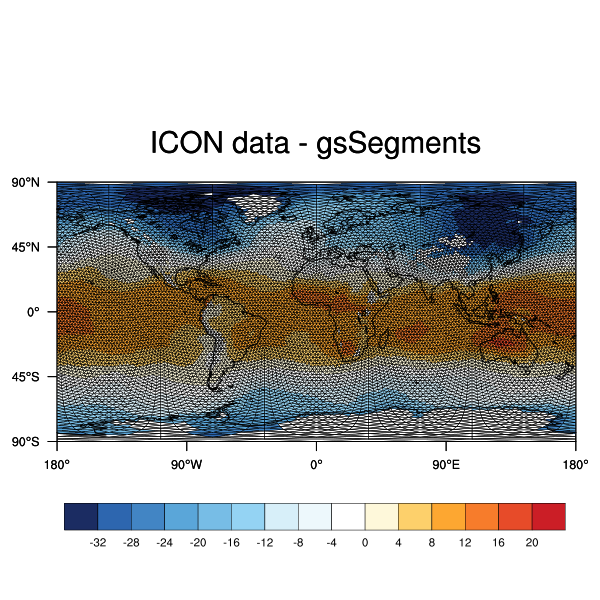

In [15]:
from IPython.display import Image
Image(filename='plot_unstructured_ICON_triangles_2_PyNGL.png')